In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15,5]

In [12]:
np.random.seed(0)
sampleSize = 500
split = 0.7
train = int(split*sampleSize)
epoch = 250

In [3]:
def binlogiregression(x,y,epoch=1000,alpha=0.05):
    if len(x.shape) == 1:
        x = np.expand_dims(x,1)
    if len(y.shape) == 1:
        y = np.expand_dims(y,1)
        
    aa,b = x.shape
    if aa<b:
        return None
    x = np.c_[np.ones([aa,1]),x]    # expanding dimension for constant
    weights = np.random.uniform(0,1,[b+1,1])
    cost=[]
    for ii in range(epoch):
        a = np.dot(x,weights)
        yHat = 1/(1+np.exp(-a))

        costTemp = np.sum(-y*np.log(yHat)-(1-y)*np.log(1-yHat))/aa
        cost.append(costTemp)
        yHat = (yHat-y)/aa
        temp = np.expand_dims(np.sum(x*yHat,axis=0),1)
        weights = weights - alpha*temp
    return weights,cost
   

In [4]:
def predict(x,weights):
    a,b = x.shape
    x = np.c_[np.ones([a,1]),x]
    x = np.dot(x,weights)
    a = 1/(1+np.exp(-np.dot(x,a)/a))
    return a

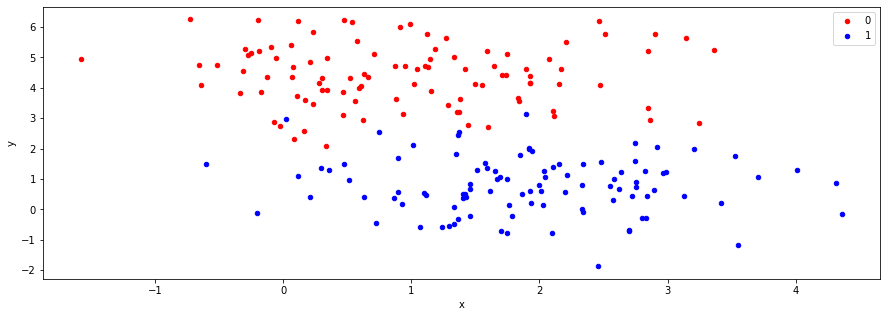

In [5]:
#https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=sampleSize, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [6]:
df = df.values
x = df[:,0:2]
y = df[:,-1]

In [7]:
xTrain,xTest,yTrain,yTest=x[0:train,:],x[train:-1,:],y[0:train],y[train:-1]
weight,cost = binlogiregression(xTrain,yTrain,epoch=epoch,alpha=0.5)
weight

array([[ 3.46248587],
       [ 1.26771723],
       [-2.02196258]])

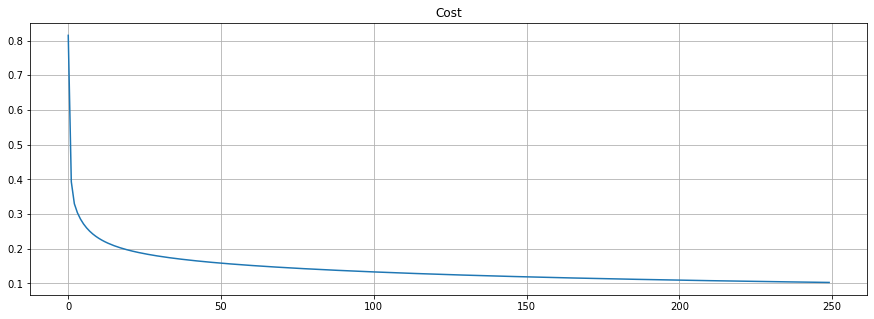

In [8]:
plt.plot(cost)
plt.title('Cost')
plt.grid()
plt.show()

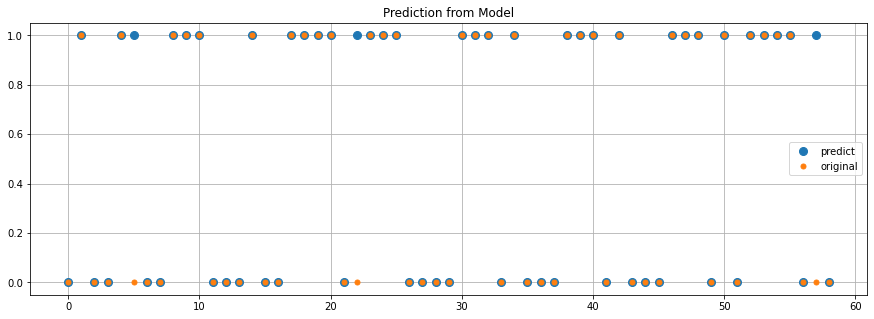

In [9]:
a = predict(xTest,weight)
plt.plot(np.round(a),'o',markersize=8,label='predict')
plt.plot(yTest,'o',markersize=5,label='original')
plt.legend()
plt.title('Prediction from Model')
plt.grid()
plt.show()

In [10]:
def r2Score(yHat,y):
    if len(yHat.shape)==1:
        yHat = np.expand_dims(yHat,1)
    if len(y.shape) == 1:
        y = np.expand_dims(y,1)
    rss = np.sum((yHat-y)**2)
    tss = np.sum((y-np.mean(y))**2)
    return (1-(rss)/tss)*100

In [11]:
r2=r2Score(a,yTest)
print('coeff of determination =',r2)

coeff of determination = 85.09475189758153
